#### Udacity Nanodegree "Data Science" - Project 1

This project covers Project 1 of the Udacity Nanodegree Course Data Science.

Considering the stack overflow surveys of the years 2018-2021, this Notebook deals with these questions:

1. What columns (i.e. questions) are contained in each of the four datasets and, hence, ca be analysed over time?
2. What is the distribution of the participants' age 2018 and 2021?
3. How does the usage of the different programming languags develop from 2018 to 2021?
4. What portion of the participants in 2021 has mental health issues?
5. Compare mental health issues with usage of programming langugage in 2021.

First import libraries and the different datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Import data

df2018 = pd.read_csv('./Data/stack-overflow-developer-survey-2018/survey_results_public.csv')

df2019 = pd.read_csv('./Data/stack-overflow-developer-survey-2019/survey_results_public.csv')

df2020 = pd.read_csv('./Data/stack-overflow-developer-survey-2020/survey_results_public.csv')

df2021 = pd.read_csv('./Data/stack-overflow-developer-survey-2021/survey_results_public.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


#### Question 1: Compare Questions/Columns over years

The four datasets contain different columns, each column corresponding to a certain questions. We want to find out, which columns stay identical over all four years.

In [3]:
questions = pd.DataFrame(columns=['2018', '2019', '2020', '2021'])

for question in df2018.columns:
    questions.loc[question, '2018'] = True

for question in df2019.columns:
    questions.loc[question, '2019'] = True

for question in df2020.columns:
    questions.loc[question, '2020'] = True

for question in df2021.columns:
    questions.loc[question, '2021'] = True

# add column with sum and sort
questions['sum'] = questions.sum(axis=1)
questions.sort_values(by="sum", ascending=False, inplace=True)

# show
questions.head()

,2018,2019,2020,2021,sum
Age,True,True,True,True,4.0
Country,True,True,True,True,4.0
Employment,True,True,True,True,4.0
Gender,True,True,True,True,4.0
DevType,True,True,True,True,4.0


In [4]:
# count questions/columns that exist for all 4 years
print(questions[questions['sum']==4].shape[0])

# calculate portion of all columns in 2018
questions[questions['sum']==4].shape[0] / len(df2018.columns)

5


0.03875968992248062

#### Conclusion

Only 5 columns are identical in all four datasets, i.e. only about 3.9% of all columns from the 2018 dataset can be analysed over time without further mapping.

#### Question 2

What is the distribution of the participants' age in 2018 and 2021?

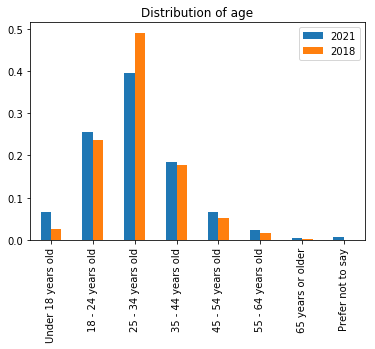

In [5]:
ages = pd.DataFrame(df2021['Age'].value_counts() / df2021['Age'].value_counts().sum())

# rename and update index to match index 2018
ages.rename(columns={'Age': '2021'}, inplace=True)
ages.set_index(ages.index.str.replace("-"," - "), inplace=True)

# add ages from 2018
ages['2018'] = df2018['Age'].value_counts() / df2018['Age'].value_counts().sum()

# sort
ages = ages.reindex(['Under 18 years old',
              '18 - 24 years old',
              '25 - 34 years old',
              '35 - 44 years old',
              '45 - 54 years old',
              '55 - 64 years old',
              '65 years or older',
              'Prefer not to say'])

# plot
ages.plot(kind='bar', title='Distribution of age')

#### Conclusion

The general distribution of participants' ages in 2018 and 2021 stays quite similar: There is a clear peak for 25-34 years (>=40%), followed by 18-24 years (abt. 25%) and 35-44 years (abt. 20%). Almost no participant is 65 years or older.
However, in 2021 the portion of participants aged 25-34 years is smaller than in 2018, but the portion of under 18 years has increased.

##### Question 3: Programming Langugages over time

How did the usage of the different programming languags develop from 2018 to 2021?

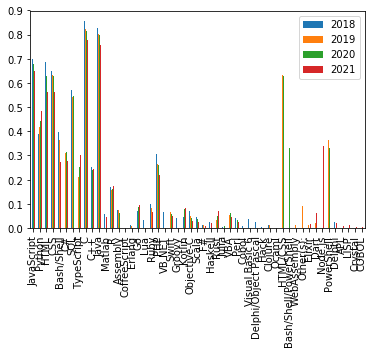

In [6]:
# Collect Data
language2018 = df2018['LanguageWorkedWith'].dropna()
language2019 = df2019['LanguageWorkedWith'].dropna()
language2020 = df2020['LanguageWorkedWith'].dropna()
language2021 = df2021['LanguageHaveWorkedWith'].dropna()

# Extract all languages
raw_languages = list(language2018) + list(language2019) + list(language2020) + list(language2021)
all_languages = []

for raw_language in raw_languages:
    for language in raw_language.split(';'):
        if language in all_languages:
            continue
        else:
            all_languages.append(language)

# Assemble dataframe
all_languages_df = pd.DataFrame(all_languages, index=all_languages, columns=['language'])

for u in all_languages:
    all_languages_df.loc[u, '2018'] = len(language2018[language2018.str.contains(u, regex=False)])
    all_languages_df.loc[u, '2019'] = len(language2019[language2019.str.contains(u, regex=False)])
    all_languages_df.loc[u, '2020'] = len(language2020[language2020.str.contains(u, regex=False)])
    all_languages_df.loc[u, '2021'] = len(language2021[language2021.str.contains(u, regex=False)])

# clean up and calculate  portions
languages_year = all_languages_df.drop('language', axis=1) / [language2018.shape[0], language2019.shape[0], language2020.shape[0], language2021.shape[0]]

# plot
languages_year[['2018', '2019', '2020', '2021']].plot(kind='bar')

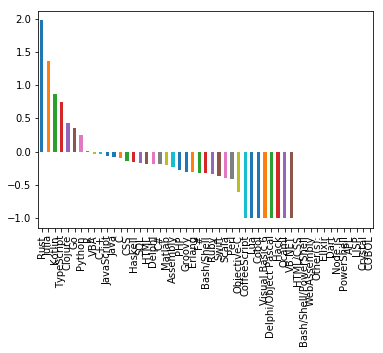

In [7]:
# calculate difference 2021/2018
languages_year.loc[languages_year['2018']>0,'diff'] = (languages_year['2021'] - languages_year['2018'])/languages_year['2018']
languages_year.sort_values(by='diff', ascending=False, inplace=True)
languages_year['diff'].plot(kind='bar')

In [8]:
# languages with increased popularity 2021 compared to 2018
languages_year[languages_year['diff']>0]

,2018,2019,2020,2021,diff
Rust,0.023706,0.031906,0.051047,0.070413,1.970236
Julia,0.005489,0.000000,0.009045,0.012968,1.362395
Kotlin,0.044783,0.064178,0.077870,0.083369,0.861633
TypeScript,0.173947,0.211525,0.254070,0.302452,0.738752
Clojure,0.013174,0.014320,0.000000,0.018845,0.430414
Go,0.070621,0.082232,0.087804,0.095669,0.354686
Python,0.387558,0.416163,0.440709,0.483165,0.246689
R,0.170399,0.159269,0.161961,0.173149,0.016139


#### Conclusion

There are 8 programming languages that have gained popularity since 2018, of course Python is one of them.


#### Question 4: What portion of the participants in 2021 has mental health issues?

The dataset 2021 contains a question regrading mental health. Let's have a look at the distribution with respect to participant's ages.

In [9]:
# collect data
mental = df2021[['MentalHealth','Age','LanguageHaveWorkedWith']].dropna()

# helper functions
def mhealth(mm):
    if 'None' in str(mm):
        return 0
    elif 'Prefer' in str(mm):
        return 0
    else: 
        return 1
    
def mlang(ml):
    tmp = mental.loc[mental['Status']==1, 'LanguageHaveWorkedWith'].str.contains(ml, regex=False)
    return len(tmp[tmp==True])

def mlang2(ml):
    tmp = mental.loc[mental['Status']==0, 'LanguageHaveWorkedWith'].str.contains(ml, regex=False)
    return len(tmp[tmp==True])
    
mental['Status'] = mental['MentalHealth'].apply(mhealth)
mental[['Age', 'Status']].groupby('Age').mean()


,Status
Age,
18-24 years old,0.223638
25-34 years old,0.212110
35-44 years old,0.208283
45-54 years old,0.192338
55-64 years old,0.177487
65 years or older,0.150538
Prefer not to say,0.150301
Under 18 years old,0.253012


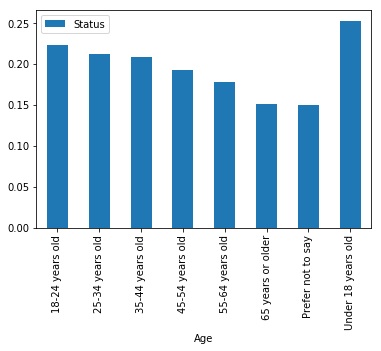

In [10]:
mental[['Age', 'Status']].groupby('Age').mean().plot(kind='bar')

#### Conclusion

For participants over 18 years, the portion of those with mental health issues is monotonously decreasing from abt. 22% to 15%. But, shockingly, about 25% of all participants below 18 years seem to have mental health issues.

#### Question 5: Compare mental health issues with usage of programming langugage in 2021.

We want to check if there might be a relationship between mental health status and used programming language.

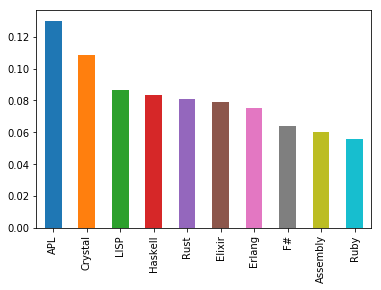

In [11]:
mental_language = all_languages_df.loc[all_languages_df['2021'] > 0, ['language']].dropna() #pd.DataFrame(all_languages, index=all_languages, columns=['language']) 

mental_language['not ok'] = mental_language['language'].apply(mlang)
mental_language['ok'] = mental_language['language'].apply(mlang2)
mental_language.drop('language', axis=1, inplace=True)

# compare to the mean
mental_language['portion'] = mental_language['not ok'] / (mental_language['not ok'] + mental_language['ok']) - mental['Status'].mean()

# more than 5% over mean 
mental_language.sort_values(by='portion', ascending=False, inplace=True)
mental_language.loc[mental_language['portion']>0.05,'portion'].plot(kind='bar')

#### Conclusion

There are 10 programming languages that are above average used by participants with mental health issues. Conditionally upon further analysis, this might point to some dependency between used programming language and mental health status. Fortunately, only one of them (Rust) has increased popularity compared to 2018.